In [ ]:
import pandas as pd
import csv

heart = pd.read_csv("heart.csv")
heart.head()

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

<Axes: >

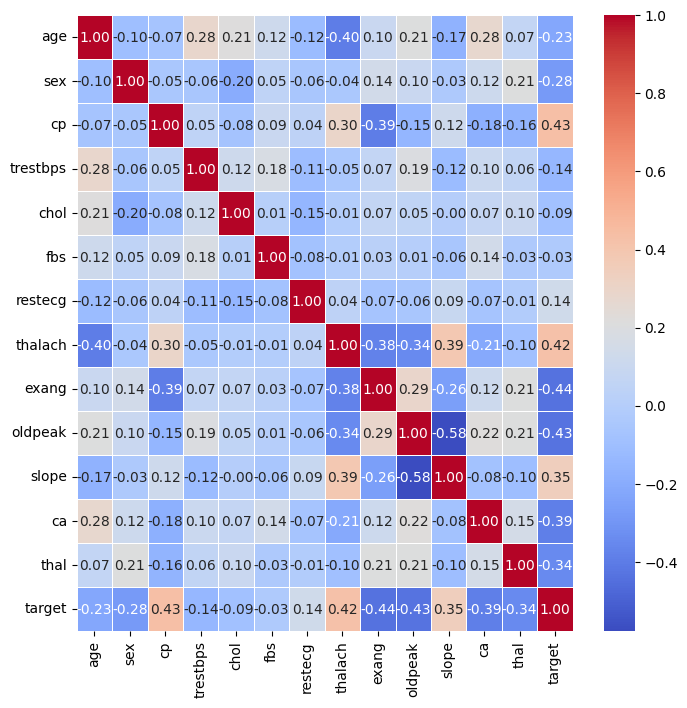

In [ ]:
# Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

corr = heart.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

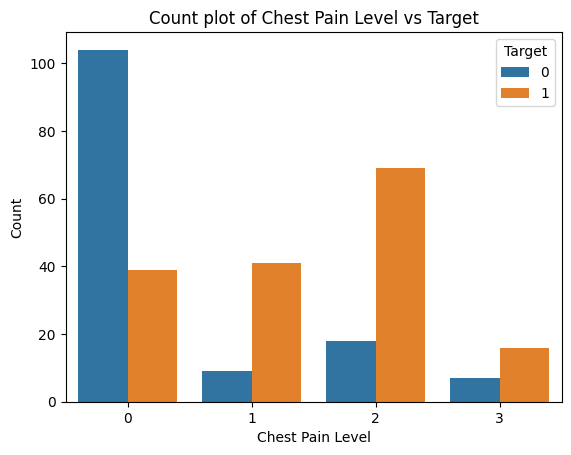

In [ ]:
# Univariate analysis: cp (chest pain types) vs. target
sns.countplot(x='cp', hue='target', data=heart)

plt.title('Count plot of Chest Pain Level vs Target')
plt.xlabel('Chest Pain Level')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right')

plt.show()

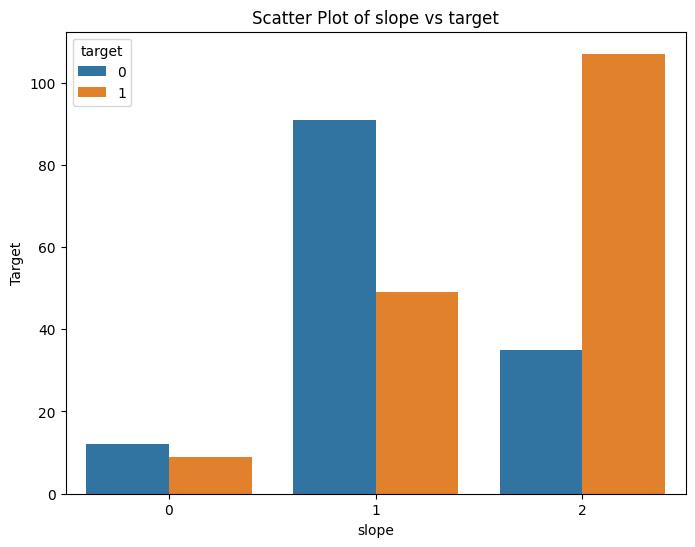

In [ ]:
# Univariate: slope vs. target
plt.figure(figsize=(8, 6))

sns.countplot(x='slope', hue='target', data=heart)

plt.title('Scatter Plot of slope vs target')
plt.xlabel('slope')
plt.ylabel('Target')

plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.utils.random import sample_without_replacement
from sklearn.utils import shuffle
import numpy as np

model1 = LogisticRegression()#its made to run off of just a set of pre-trained models
model2 = SVC()
model3 = KNeighborsClassifier()
model4 = DecisionTreeClassifier()

models = [model1, model2, model3, model4]

data = load_iris()


X = data.data
y = data.target
X, y = shuffle(X, y, random_state=42)



for i in range(len(models)):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, train_size = len(X)//len(models), random_state=i)
  models[i].fit(X_train, y_train)

for i in range(len(models)):
  print(models[i].score(X_test, y_test))

def stacking(models, X, y, meta_model):
  #weights = np.random.rand(len(models), 1)
  base_model_preds = []
  for i in range(len(models)):
    pred = models[i].predict(X)
    base_model_preds.append(pred)
  base_model_preds = np.array(base_model_preds)
  base_model_preds = np.transpose(base_model_preds)
  meta_model.fit(base_model_preds, y)
  return meta_model.score(base_model_preds, y)



def score(pred, label):
  count = 0;
  right = 0;
  for i in range(len(pred)):
    count += 1
    if pred[i] == label[i]:
      right += 1
  return right/count

def vote_bagging(models, X, y):
  base_model_preds = []
  for i in range(len(models)):
    pred = models[i].predict(X)
    base_model_preds.append(pred)
  base_model_preds = np.array(base_model_preds)
  base_model_preds = np.transpose(base_model_preds)
  bag_model_preds = []
  for i in range(len(base_model_preds)):
    counts = {}
    for j in range(len(models)):
      if base_model_preds[i][j] not in counts:
        counts[base_model_preds[i][j]] = 1
      else:
        counts[base_model_preds[i][j]] += 1
    bag_model_preds.append(max(counts, key=counts.get))
  return score(bag_model_preds, y)

def avg_bagging(models, X, y):
  base_model_preds = []
  for i in range(len(models)):
    pred = models[i].predict(X)
    base_model_preds.append(pred)
  base_model_preds = np.array(base_model_preds)
  base_model_preds = np.transpose(base_model_preds)
  bag_model_preds = []
  for i in range(len(base_model_preds)):
    bag_model_preds.append(round(np.mean(base_model_preds[i])))
  return score(bag_model_preds, y)



print("bagging-vote: ", vote_bagging(models, X, y))

print("bagging-avg: ", avg_bagging(models, X, y))

print("stacking-LR: ", stacking(models, X, y, LogisticRegression()))

0.9666666666666667
0.9333333333333333
0.9333333333333333
0.9666666666666667
bagging-vote:  0.9533333333333334
bagging-avg:  0.9533333333333334
stacking-LR:  0.98


In [ ]:
from itertools import combinations
three_models = list(combinations(models, 3))
for i in three_models:
  print(i, stacking(i, X, y, LogisticRegression()))

two_models = list(combinations(models, 2))
for i in two_models:
  print(i, stacking(i, X, y, LogisticRegression()))

for i in three_models:
  print(i, vote_bagging(i, X, y))

two_models = list(combinations(models, 2))
for i in two_models:
  print(i, vote_bagging(i, X, y))

(LogisticRegression(), SVC(), KNeighborsClassifier()) 0.9533333333333334
(LogisticRegression(), SVC(), DecisionTreeClassifier()) 0.98
(LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier()) 0.98
(SVC(), KNeighborsClassifier(), DecisionTreeClassifier()) 0.9733333333333334
(LogisticRegression(), SVC()) 0.9533333333333334
(LogisticRegression(), KNeighborsClassifier()) 0.9533333333333334
(LogisticRegression(), DecisionTreeClassifier()) 0.98
(SVC(), KNeighborsClassifier()) 0.9466666666666667
(SVC(), DecisionTreeClassifier()) 0.9666666666666667
(KNeighborsClassifier(), DecisionTreeClassifier()) 0.98
(LogisticRegression(), SVC(), KNeighborsClassifier()) 0.9466666666666667
(LogisticRegression(), SVC(), DecisionTreeClassifier()) 0.9466666666666667
(LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier()) 0.9533333333333334
(SVC(), KNeighborsClassifier(), DecisionTreeClassifier()) 0.94
(LogisticRegression(), SVC()) 0.9533333333333334
(LogisticRegression(), KNeighb

In [ ]:
#for lea
filename = '/content/LLCP2023.XPT'
df = pd.read_sas(filename)
df

<ipython-input-31-8967c06ae893>:3: UserWarning: xport file may be corrupted.
  df = pd.read_sas(filename)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.000000e+00,1.000000e+00,b'03012023',b'03',b'01',b'2023',1.100000e+03,b'2023000001',2.023000e+09,1.000000e+00,...,5.397605e-79,1.000000e+00,5.397605e-79,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
1,1.000000e+00,1.000000e+00,b'01062023',b'01',b'06',b'2023',1.100000e+03,b'2023000002',2.023000e+09,1.000000e+00,...,5.397605e-79,1.000000e+00,5.397605e-79,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
2,1.000000e+00,1.000000e+00,b'03082023',b'03',b'08',b'2023',1.100000e+03,b'2023000003',2.023000e+09,1.000000e+00,...,5.397605e-79,1.000000e+00,5.397605e-79,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
3,1.000000e+00,1.000000e+00,b'03062023',b'03',b'06',b'2023',1.100000e+03,b'2023000004',2.023000e+09,1.000000e+00,...,5.397605e-79,1.000000e+00,5.397605e-79,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
4,1.000000e+00,1.000000e+00,b'01062023',b'01',b'06',b'2023',1.100000e+03,b'2023000005',2.023000e+09,1.000000e+00,...,7.000000e+00,1.000000e+00,4.700000e+01,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433694,5.397607e-79,5.397607e-79,b'\x00\x00\x00\x00.',b'',b'',b'BX',5.397607e-79,b'\x00\x00\x00\x00A\x10',5.483837e-79,5.483343e-79,...,5.397607e-79,5.397607e-79,5.397606e-79,5.397607e-79,5.397606e-79,5.397607e-79,5.397607e-79,5.397607e-79,5.397607e-79,5.397607e-79
433695,5.397607e-79,5.397607e-79,b'\x00\x00\x00\x00A\xb0',b'',b'',b'BM',5.397607e-79,b'\x00\x00\x00\x00A',5.483343e-79,5.483343e-79,...,5.397607e-79,5.397607e-79,5.397606e-79,5.397607e-79,5.397606e-79,5.397607e-79,5.397607e-79,5.397607e-79,5.397607e-79,5.397607e-79
433696,5.397607e-79,5.397607e-79,b'\x00\x00\x00\x00.',b'',b'',b'A\x10',5.397607e-79,b'\x00\x00\x00\x00A',5.483343e-79,5.483425e-79,...,5.397607e-79,5.397607e-79,5.397606e-79,5.397607e-79,5.397606e-79,5.397607e-79,5.397607e-79,5.397607e-79,5.397607e-79,5.397607e-79
433697,5.397607e-79,5.397607e-79,b'\x00\x00\x00\x00BX',b'',b'',b'A\x10',5.397607e-79,b'\x00\x00\x00\x00A',5.483343e-79,5.483343e-79,...,5.397607e-79,5.397607e-79,5.397606e-79,5.397607e-79,5.397606e-79,5.397607e-79,5.397607e-79,5.397607e-79,5.397607e-79,5.397607e-79


In [ ]:
import pandas as pd
filename = f'{path}/LLCP2023.XPT'
df = pd.read_sas(filename)
#this works for reading in the XPT file from CDC website.
#2023 BRFSS Codebook CDC <-this is the file name on cdc website that gives you info on all the variables
#https://www.cdc.gov/brfss/annual_data/2023/zip/codebook23_llcp-v2-508.zip

NameError: name 'path' is not defined

In [ ]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.flush_and_unmount()


In [ ]:
file_path = '/content/drive/My Drive/FORMAT23.sas'

with open(file_path, 'r') as file:
  sas_codebook = file.read()

print(sas_codebook[:500])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/FORMAT23.sas'

In [ ]:
import pandas as pd
import numpy as np
filename = '/content/drive/MyDrive/MSDA/Semester 2/DATA 245: Machine Learning Technology/HW/LLCP2023.XPT'
df = pd.read_sas(filename)

https://www.cdc.gov/brfss/annual_data/2023/zip/codebook23_llcp-v2-508.zip

this file tells about all the variables in the cdc data

below are some column names and an idea of what they represent.

In [ ]:
df.head()
df.shape

(433323, 350)

In [ ]:
colnames = ['PRIMINS1', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'EXERHMM1', 'BPHIGH6', 'BPMEDS1', 'TOLDHI3', 'CHOLMED3', 'CVDINFR4', 'CVDCRHD4', 'DIABETE4', 'EDUCA', 'EMPLOY1', 'INCOME3', 'WEIGHT2', 'HEIGHT3', 'SMOKDAY2', 'AVEDRNK3', 'DIABTYPE', 'HASYMP1', 'HASYMP2', 'HASYMP3', 'HASYMP4', 'HASYMP5', 'HASYMP6', 'ASPIRIN', '_AGE80']
colmeanings = ['Source of Health Insurance?', 'Have Personal Health Care Provider?', 'Could Not Afford To See Doctor', 'time since last routine checkup', 'Exercise in Past 30 Days', 'Minutes exercised', 'high blood pressure?', 'Blood Pressure Medication', 'Cholesterol Is High', 'medicine for high cholesterol', 'Diagnosed with Heart Attack', 'Diagnosed with Angina or Coronary Heart Disease', 'diabetes', 'Education Level', 'Employment Status', 'Income Level', 'Weight', 'Height', 'Smoking', 'alcoholic drinks per day', 'type of diabetes', 'Heart Attack Symptoms - Jaw/Back/Neck Pain', 'Heart Attack Symptoms - Weak/Light-headed/Faint', 'Heart Attack Symptoms - Chest Pain/Discomfort', 'Heart Attack Symptoms - Vision Problems', 'Heart Attack Symptoms - Pain or Discomfort in Arms/Shoulder', 'Heart Attack Symptoms - Shortness of Breath', 'aspirin', ' Imputed Age']
for i in range(len(colnames)):
  print(colnames[i], colmeanings[i])

PRIMINS1 Source of Health Insurance?
PERSDOC3 Have Personal Health Care Provider?
MEDCOST1 Could Not Afford To See Doctor
CHECKUP1 time since last routine checkup
EXERANY2 Exercise in Past 30 Days
EXERHMM1 Minutes exercised
BPHIGH6 high blood pressure?
BPMEDS1 Blood Pressure Medication
TOLDHI3 Cholesterol Is High
CHOLMED3 medicine for high cholesterol
CVDINFR4 Diagnosed with Heart Attack
CVDCRHD4 Diagnosed with Angina or Coronary Heart Disease
DIABETE4 diabetes
EDUCA Education Level
EMPLOY1 Employment Status
INCOME3 Income Level
WEIGHT2 Weight
HEIGHT3 Height
SMOKDAY2 Smoking
AVEDRNK3 alcoholic drinks per day
DIABTYPE type of diabetes
HASYMP1 Heart Attack Symptoms - Jaw/Back/Neck Pain
HASYMP2 Heart Attack Symptoms - Weak/Light-headed/Faint
HASYMP3 Heart Attack Symptoms - Chest Pain/Discomfort
HASYMP4 Heart Attack Symptoms - Vision Problems
HASYMP5 Heart Attack Symptoms - Pain or Discomfort in Arms/Shoulder
HASYMP6 Heart Attack Symptoms - Shortness of Breath
ASPIRIN aspirin
_AGE80  Imput

In [ ]:
from sklearn.utils import shuffle

from math import nan
colnames = ['CVDINFR4', 'CVDCRHD4', 'BPHIGH6','TOLDHI3','DIABETE4', 'WEIGHT2', 'HEIGHT3', 'SMOKDAY2', 'HASYMP1', 'HASYMP2', 'HASYMP3', 'HASYMP4', 'HASYMP5', 'HASYMP6', 'ASPIRIN', '_AGE80']
#colnames = ['CVDINFR4', 'CVDCRHD4', 'WEIGHT2', 'HEIGHT3', 'SMOKDAY2', 'HASYMP1', 'HASYMP2', 'HASYMP3', 'HASYMP4', 'HASYMP5', 'HASYMP6', 'ASPIRIN', '_AGE80']
#colnames = ['CVDINFR4',  'HASYMP1', 'HASYMP2', 'HASYMP3', 'HASYMP4', 'HASYMP5', 'HASYMP6',  '_AGE80']
print(df.shape)

#this is some data treatment ideas

data = df[colnames].copy()

data = data.reset_index(drop=True)
values_to_drop= ['CVDINFR4', 7, 9]#drops other options such as no answer or dont know
mask = ~data.isin(values_to_drop).any(axis=1)
data = data[mask]

#data = data.interpolate(method='linear')#run linear interpolation to fill in nans (not enough data if you just drop them)
data = data.fillna(0)

values_to_drop= ['CVDINFR4', 1, 0]
mask = data.isin(values_to_drop).any(axis=1)
data = data[mask]
data = data.dropna()
data = data.reset_index(drop=True)


data['CVDINFR4'] = -1*data['CVDINFR4']+2#set target variable to 0 for no heart attack and 1 for yes heart attack, from 1 and 2
X = data.drop(columns=['CVDINFR4'])
X = (X-X.min())/(X.max()-X.min())#normalize data
data = pd.concat([X, data['CVDINFR4']], axis=1)
data.head()

#train_data, test_data = train_test_split(data, test_size=.2, random_state=42)

#print(test_data['CVDINFR4'].value_counts())
#print(train_data['CVDINFR4'].value_counts())


def stratified_sample(data, label, positive, negative, ratio):
  majority_class = data.loc[data[label] == negative]
  minority_class = data.loc[data[label] == positive]
  majority_downsampled = majority_class.sample(n=len(minority_class)*ratio, random_state=42)
  df_balanced = pd.concat([majority_downsampled, minority_class])
  return df_balanced

balanced_data = stratified_sample(data, 'CVDINFR4', 1, 0, 1)

balanced_data.head()
balanced_data = shuffle(balanced_data, random_state=42)
balanced_data = balanced_data.reset_index(drop=True)
balanced_data.head()

#ytrain = df_balanced['CVDINFR4']
#Xtrain = df_balanced.drop(columns=['CVDINFR4'])
#ytrain.value_counts()
#Xtest = test_data.drop(columns=['CVDINFR4'])
#ytest = test_data['CVDINFR4']

#Xtrain, ytrain = shuffle(Xtrain, ytrain, random_state=42)
#Xtest, ytest = shuffle(Xtest, ytest, random_state=42)


(433323, 350)


,CVDCRHD4,BPHIGH6,TOLDHI3,DIABETE4,WEIGHT2,HEIGHT3,SMOKDAY2,HASYMP1,HASYMP2,HASYMP3,HASYMP4,HASYMP5,HASYMP6,ASPIRIN,_AGE80,CVDINFR4
0,1.0,0.75,1.0,0.75,0.017002,0.050405,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.435484,0.0
1,1.0,0.25,1.0,0.75,0.015702,0.050905,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887097,0.0
2,1.0,0.50,1.0,0.75,0.016502,0.050805,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145161,0.0
3,1.0,0.75,1.0,0.75,0.012001,0.050205,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.548387,0.0
4,1.0,0.25,0.5,0.75,0.018002,0.050905,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.774194,1.0


In [ ]:
balanced_data['CVDINFR4'].value_counts()

,count
CVDINFR4,
0.0,21701
1.0,21701


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import shuffle
import numpy as np

class stacking_model():
  def __init__(self, base_models, meta_model, random_state, test_size):#base models is actually a nested dictionary with the model name and hyperparameters example entry: ,'name':{'arg1':val, 'arg2': val, 'arg3', val},
    self.base_models = base_models
    self.meta_model = meta_model
    self.fitted_base_models = []
    self.fitted_meta_model = None
    self.random_state = random_state
    self.supported_base_models = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier']
    self.test_size = test_size

  def get_supported_models(self):
    return self.supported_base_models

  def print_supported_models(self):
    print(self.supported_base_models)

  def get_models(self):
    return self.base_models

  def eval(self, X):
    base_model_preds = []
    for i in range(len(self.fitted_base_models)):
      pred = self.fitted_base_models[i].predict(X)
      base_model_preds.append(pred)
    base_model_preds = np.array(base_model_preds)
    base_model_preds = np.transpose(base_model_preds)
    Xmeta = base_model_preds
    return self.fitted_meta_model.predict(Xmeta)

  def fit(self, X, y, rs = None, ts = None):
    #print('fitting')
    #print(self.base_models)
    #print(self.meta_model)
    if rs is None:
      rs = self.random_state
    if ts is None:
      ts = self.test_size
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=ts, random_state=rs)
    i=0
    for model in self.base_models:
      model_name = model[0]
      if model_name == 'LogisticRegression':
        #print('fitting logistic regression base model')
        lr = LogisticRegression(penalty = model[1]['penalty'], C = model[1]['C'], random_state = self.random_state+i, solver = model[1]['solver'])
        lr.fit(Xtrain, ytrain)
        self.fitted_base_models.append(lr)

      elif model_name == 'SVC':
        #print('fitting support vector machine base model')
        svm = SVC(C = model[1]['C'], kernel = model[1]['kernel'], gamma = model[1]['gamma'], random_state = self.random_state+i)
        svm.fit(Xtrain, ytrain)
        self.fitted_base_models.append(svm)

      elif model_name == 'KNeighborsClassifier':
        #print('fitting k-nearest neighbors base model')
        knn = KNeighborsClassifier(n_neighbors = model[1]['n_neighbors'], weights = model[1]['weights'], algorithm = model[1]['algorithm'])
        knn.fit(Xtrain, ytrain)
        self.fitted_base_models.append(knn)

      elif model_name == 'DecisionTreeClassifier':
        #print('fitting decision tree base model')
        dtc = DecisionTreeClassifier(criterion = model[1]['criterion'], max_depth = model[1]['max_depth'], min_samples_leaf = model[1]['min_samples_leaf'], random_state = self.random_state+i)
        dtc.fit(Xtrain, ytrain)
        self.fitted_base_models.append(dtc)
      else:
        print("Error: model not supported -> ", model_name)
        print("Supported models: ", self.get_supported_models())
        print("Continuing to fit other base models")
      i+=1


      base_model_preds = []
      for i in range(len(self.fitted_base_models)):
        pred = self.fitted_base_models[i].predict(Xtest)
        base_model_preds.append(pred)
      base_model_preds = np.array(base_model_preds)
      base_model_preds = np.transpose(base_model_preds)
      Xmeta = base_model_preds
      ymeta = ytest


      model_name = self.meta_model[0]

      if model_name == 'LogisticRegression':
        lr = LogisticRegression(penalty = self.meta_model[1]['penalty'], C = self.meta_model[1]['C'], random_state = self.random_state, solver = self.meta_model[1]['solver'])
        lr.fit(Xmeta, ymeta)
        self.fitted_meta_model = lr

      elif model_name == 'SVC':
        svm = SVC(C = self.meta_model[1]['C'], kernel = self.meta_model[1]['kernel'], gamma = self.meta_model[1]['gamma'], random_state = self.random_state)
        svm.fit(Xmeta, ymeta)
        self.fitted_meta_model=svm

      elif model_name == 'KNeighborsClassifier':
        knn = KNeighborsClassifier(n_neighbors = self.meta_model[1]['n_neighbors'], weights = self.meta_model[1]['weights'], algorithm = self.meta_model[1]['algorithm'])
        knn.fit(Xmeta, ymeta)
        self.fitted_meta_model = knn

      elif model_name == 'DecisionTreeClassifier':
        dtc = DecisionTreeClassifier(criterion = self.meta_model[1]['criterion'], max_depth = self.meta_model[1]['max_depth'], min_samples_leaf = self.meta_model[1]['min_samples_leaf'], random_state = self.random_state)
        dtc.fit(Xmeta, ymeta)
        self.fitted_meta_model = dtc
      else:
        print("Error: model not supported -> ", model_name)
        print("Supported models: ", self.get_supported_models())
        print("Continuing to fit other base models")
        return



class bagging_model():
  def __init__(self, base_models, random_state, agg_method, test_size):
    self.base_models = base_models
    self.fitted_base_models = []
    self.random_state = random_state
    self.agg_method = agg_method
    self.supported_agg_methods = ['vote', 'avg']
    self.supported_base_models = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier']
    self.test_size = test_size

  def get_supported_models(self):
    return self.supported_base_models

  def print_supported_models(self):
    print(self.supported_base_models)


  def eval(self, X):
    base_model_preds = []
    for i in range(len(self.fitted_base_models)):
      pred = self.fitted_base_models[i].predict(X)
      base_model_preds.append(pred)
    base_model_preds = np.array(base_model_preds)
    base_model_preds = np.transpose(base_model_preds)
    bag_model_preds = []
    if self.agg_method == 'vote':
      for i in range(len(base_model_preds)):
        counts = {}
        for j in range(len(self.fitted_base_models)):
          if base_model_preds[i][j] not in counts:
            counts[base_model_preds[i][j]] = 1
          else:
            counts[base_model_preds[i][j]] += 1
        bag_model_preds.append(max(counts, key=counts.get))
    elif self.agg_method == 'avg':
      for i in range(len(base_model_preds)):
        bag_model_preds.append(round(np.mean(base_model_preds[i])))
    return bag_model_preds

  def fit(self, data, label, rs = None, ts = None):
    if ts is None:
      ts = self.test_size
    if rs is None:
      rs = self.random_state

    i=0
    #bags = self.bootstrap_sample(data, len(self.base_models), rs, ts)

    #print(len(self.base_models), "models")
    #print(len(bags), "bags")
    for model in self.base_models:
      model_name = model[0]

      train_df = data.sample(n=int(ts*len(data)), replace=True, random_state=rs+i)
      Xtrain = train_df.drop(columns=[label])
      ytrain = train_df[label]
      if model_name == 'LogisticRegression':
        #print('fitting logistic regression base model')
        if(model[1]['penalty']=='none'):
          lr = LogisticRegression(C = model[1]['C'], random_state = self.random_state, solver = model[1]['solver'])
        else:
          lr = LogisticRegression(penalty = model[1]['penalty'], C = model[1]['C'], random_state = self.random_state+i, solver = model[1]['solver'])
        lr.fit(Xtrain, ytrain)
        self.fitted_base_models.append(lr)

      elif model_name == 'SVC':
        #print('fitting support vector machine base model')
        svm = SVC(C = model[1]['C'], kernel = model[1]['kernel'], gamma = model[1]['gamma'], random_state = self.random_state + i)
        svm.fit(Xtrain, ytrain)
        self.fitted_base_models.append(svm)

      elif model_name == 'KNeighborsClassifier':
        #print('fitting k-nearest neighbors base model')
        knn = KNeighborsClassifier(n_neighbors = model[1]['n_neighbors'], weights = model[1]['weights'], algorithm = model[1]['algorithm'])
        knn.fit(Xtrain, ytrain)
        self.fitted_base_models.append(knn)

      elif model_name == 'DecisionTreeClassifier':
        #print('fitting decision tree base model')
        dtc = DecisionTreeClassifier(criterion = model[1]['criterion'], max_depth = model[1]['max_depth'], min_samples_leaf = model[1]['min_samples_leaf'], random_state = self.random_state + i)
        dtc.fit(Xtrain, ytrain)
        self.fitted_base_models.append(dtc)
      else:
        print("Error: model not supported -> ", model_name)
        print("Supported models: ", self.get_supported_models())
        print("Continuing to fit other base models")
      i+=1
    #return out_of_bag



  def bootstrap_sample(self, data, n_models, random_state, test_split):
    bags = []
    #out_of_bag = data
    train_split = 1-test_split
    for i in range(n_models):
      train_df = data.sample(n=int(train_split*len(data)), replace=True, random_state=random_state+i)

      #intersection_index = out_of_bag.index.intersection(train_df.index)
      #out_of_bag = out_of_bag.loc[intersection_index]

      bags.append(train_df)
    return bags


import math

class boosting_model():
  def __init__(self, base_models, random_state, loss_function, learning_rate, test_size, weak_learner_strength):
    self.base_models = base_models
    self.fitted_base_models = []
    self.influence_scores = []
    self.random_state = random_state
    self.learning_rate = learning_rate
    self.loss_function = loss_function
    self.supported_base_models = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier']
    self.initial_guesser = None
    self.min_max = []
    self.test_size = test_size
    self.weak_learner_strength = weak_learner_strength

  def get_supported_models(self):
    return self.supported_base_models

  def print_supported_models(self):
    print(self.supported_base_models)





  def eval(self, Xtest):
    #zeros = np.zeros(len(Xtest))
    #initial_weights = zeros + 1/len(zeros)
    #Xtest['weights']=initial_weights
    preds = np.zeros(len(Xtest))
    for i in range(len(self.fitted_base_models)):
      prediction = self.fitted_base_models[i].predict(Xtest)
      prediction = 2*prediction-1
      preds += prediction * self.influence_scores[i]

    preds = np.sign(preds)
    preds[preds==0]=1
    preds[preds==-1]=0
    return preds



  def weighted_sample(self, X, ts):
    sample_index = np.random.choice(X.index, size=int((1-ts)*len(X)), replace=True, p=X['weights'])
    return sample_index
    #return X.loc[sample_index]



  def fit(self, Xtrain, ytrain, rs = None,  lr = None, ts = None):
    if rs is None:
      rs = self.random_state
    if lr is None:
      lr = self.learning_rate
    if ts is None:
      ts = self.test_size


    #self.initial_guesser = np.mean(ytrain)
    #print(self.initial_guesser)
    zeros = np.zeros(len(ytrain))
    initial_weights = zeros + 1/len(zeros)
    #print('oldy', ytrain)
    #gradient_calc = self.gradient(ypred, ytrain)
    #ytrain = ytrain - gradient_calc
    #print('newy', ytrain)
    #print('initial_preds', ypred)
    #pseudo_residuals = ypred - lr * self.gradient(ypred, ytrain)
    #print('initial_residuals', pseudo_residuals)
    Xtrain['weights']=initial_weights
    i=0
    for model in self.base_models:
      #ysample, Xsample = self.prob_bag(Xtrain, ytrain, ts)
      i+=1
      #print(Xtrain, ytrain)
      model_name = model[0]

      #getting the weighted training sample
      data = pd.concat([Xtrain, ytrain], axis=1)
      sample_index = self.weighted_sample(data, ts)
      sample = data.loc[sample_index]

      y_train = sample['CVDINFR4']
      sample = sample.drop(columns=['CVDINFR4'])
      X_train = sample.drop(columns = ['weights'])


      if model_name == 'LogisticRegression':
        #print('fitting logistic regression base model')
        if(model[1]['penalty']=='none'):
          new_model = LogisticRegression(C = model[1]['C'], random_state = self.random_state+i, solver = model[1]['solver'], max_iter= int(100*self.weak_learner_strength))
        else:
          new_model = LogisticRegression(penalty = model[1]['penalty'], C = model[1]['C'], random_state = self.random_state+i, solver = model[1]['solver'], max_iter= int(100*self.weak_learner_strength))
      elif model_name == 'SVC':
        #print('fitting support vector machine base model')
        new_model = SVC(C = model[1]['C'], kernel = model[1]['kernel'], gamma = model[1]['gamma'], max_iter = int(100*self.weak_learner_strength), random_state = self.random_state+i)
      elif model_name == 'KNeighborsClassifier':
        #print('fitting k-nearest neighbors base model')
        #print(int(model[1]['n_neighbors']/(self.weak_learner_strength**2)))
        new_model = KNeighborsClassifier(n_neighbors = int(model[1]['n_neighbors']/(self.weak_learner_strength**3)), weights = model[1]['weights'], algorithm = model[1]['algorithm'])
      elif model_name == 'DecisionTreeClassifier':
        #print('fitting decision tree base model')
        #new_model = DecisionTreeClassifier(criterion = model[1]['criterion'], max_depth = int(model[1]['max_depth']*(self.weak_learner_strength)), min_samples_leaf = model[1]['min_samples_leaf'], random_state = self.random_state)
        new_model = DecisionTreeClassifier(criterion = model[1]['criterion'], max_depth = round(model[1]['max_depth']*self.weak_learner_strength), min_samples_leaf = model[1]['min_samples_leaf'], random_state = self.random_state+i)
      else:
        print("Error: model not supported -> ", model_name)
        print("Supported models: ", self.get_supported_models())
        print("Continuing to fit other base models")
        continue
      new_model.fit(X_train, y_train)
      self.fitted_base_models.append(new_model)
      y_pred = new_model.predict(X_train)

      misclassified = y_pred-y_train
      misclassified = abs(misclassified)
      misclassified_weights = misclassified * sample['weights']
      error = misclassified_weights.sum()
      influence_score = lr*np.log((1-error)/error)
      self.influence_scores.append(influence_score)

      sample['weights'] = sample['weights'] * np.exp(influence_score)

      sample['weights'] = sample['weights']/(sample['weights'].sum())



      Xtrain.loc[sample_index,'weights'] = sample['weights']
      Xtrain['weights'] = Xtrain['weights']/(Xtrain['weights'].sum())#the weights get separated before training, updated and fed back in



In [ ]:
from sklearn.impute import SimpleImputer

X = balanced_data.drop(columns=['CVDINFR4'])
y = balanced_data['CVDINFR4']

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # Or use 'median'/'most_frequent'

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from itertools import combinations
from itertools import permutations
#these are all model options and all of their respective hyperparameters/hyperparameter options in order
#the floats and ints can be whatever you want, I just arbitrarily picked some
model_options = {'LogisticRegression':[('penalty', ['l1', 'l2', 'none']),\
                                       ('C', [.5, 1.0, 2.0]),\
                                       ('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])\
                                       ],\
                 'SVC':[('C', [.5, 1.0, 2.0]),\
                        ('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),\
                        ('gamma', ['scale', 'auto'])\
                        ],\
                 'KNeighborsClassifier':[('n_neighbors',[5, 10, 20]),\
                                         ('weights', ['distance', 'uniform']),\
                                         ('algorithm',['auto', 'ball_tree', 'kd_tree', 'brute'])\
                                         ],\
                 'DecisionTreeClassifier':[('criterion',['entropy', 'gini', 'log_loss']),\
                                           ('max_depth',[5, 10, 20]),\
                                           ('min_samples_leaf',[5, 10, 20])\
                                           ]\
                 }




#this constructs a model-argument dictionary ready to be input as an argument to the stacking ensemble
#it just picks the second value for each hyperparameter
test_base_models = []
for model in model_options.keys():
  test_model_name = model
  test_model_args = {}
  for i in range(len(model_options[model])):
    test_model_args[model_options[model][i][0]] = model_options[model][i][1][1]
  test_base_models.append((test_model_name, test_model_args))
print("test_models", test_base_models)

#this picks a meta model much in the same way


model_name = 'LogisticRegression'
model_args = {}
for i in range(len(model_options[model_name])):
  model_args[model_options[model_name][i][0]] = model_options[model_name][i][1][1]
meta_model = (model_name, model_args)
print("meta_model", meta_model)


def generate_model_args(model_options, model_name, model_args):
  gen_model = {}
  gen_model[model_name] = {}
  for i in range(len(model_args)):
    gen_model[model_name][model_options[model_name][i][0]] = model_args[i]
  return gen_model



gen_model = generate_model_args(model_options, 'LogisticRegression', ['l2', .5, 'lbfgs'])
print(gen_model)



test_models [('LogisticRegression', {'penalty': 'l2', 'C': 1.0, 'solver': 'lbfgs'}), ('SVC', {'C': 1.0, 'kernel': 'poly', 'gamma': 'auto'}), ('KNeighborsClassifier', {'n_neighbors': 10, 'weights': 'uniform', 'algorithm': 'ball_tree'}), ('DecisionTreeClassifier', {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10})]
meta_model ('LogisticRegression', {'penalty': 'l2', 'C': 1.0, 'solver': 'lbfgs'})
{'LogisticRegression': {'penalty': 'l2', 'C': 0.5, 'solver': 'lbfgs'}}


In [ ]:
#
#this code generates a list of every model we can create with these 4 models, and each of the 3 hyperparameters, there's 135 possible configurations. to test every combination of 5 of these would be like 4 billion models, probably not practical lol
#instead i think maybe we just test the 135 of these, take the best version of each, and use those for the actual ensemble
#

base_models = []
for model in list(model_options.keys()):
  for arg_1_val in model_options[model][0][1]:
    for arg_2_val in model_options[model][1][1]:
        for arg_3_val in model_options[model][2][1]:
          model_args = {}
          model_args[model_options[model][2][0]] = arg_3_val
          model_args[model_options[model][1][0]] = arg_2_val
          model_args[model_options[model][0][0]] = arg_1_val
          #model_to_add[0] = model
          #model_to_add[1] = model_args
          model_to_add = (model, model_args)
          if(model_to_add[0]=='LogisticRegression'):
            if(model_to_add[1]['solver'] in ['lbfgs', 'newton-cg', 'sag']):
              if(model_to_add[1]['penalty'] in ['l2', 'none']):
                base_models.append(model_to_add)
              else:
                continue
            else:
              base_models.append(model_to_add)

          else:
            base_models.append(model_to_add)


y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)
model_tests = []
for model in base_models:
  model_name = model[0]
  if model_name == 'LogisticRegression':
    #print('fitting logistic regression base model')
    if(model[1]['penalty']=='none'):
      trained_model = LogisticRegression(C = model[1]['C'], random_state =42, solver = model[1]['solver'])
    else:
      trained_model = LogisticRegression(penalty = model[1]['penalty'], C = model[1]['C'], random_state =42, solver = model[1]['solver'])
    trained_model.fit(Xtrain, ytrain)
  elif model_name == 'SVC':
    #print('fitting support vector machine base model')
    trained_model = SVC(C = model[1]['C'], kernel = model[1]['kernel'], gamma = model[1]['gamma'], random_state = 42)
    trained_model.fit(Xtrain, ytrain)
  elif model_name == 'KNeighborsClassifier':
    #print('fitting k-nearest neighbors base model')
    trained_model = KNeighborsClassifier(n_neighbors = model[1]['n_neighbors'], weights = model[1]['weights'], algorithm = model[1]['algorithm'])
    trained_model.fit(Xtrain, ytrain)
  elif model_name == 'DecisionTreeClassifier':
    #print('fitting decision tree base model')
    trained_model = DecisionTreeClassifier(criterion = model[1]['criterion'], max_depth = model[1]['max_depth'], min_samples_leaf = model[1]['min_samples_leaf'], random_state = 42)
    trained_model.fit(Xtrain, ytrain)
  ypred = trained_model.predict(Xtest)
  #print(confusion_matrix(ytest, ypred))
  model_test = {}
  model_test['model'] = model
  model_test['accuracy'] = accuracy_score(ytest, ypred)
  model_test['precision'] = precision_score(ytest, ypred)
  model_test['recall'] = recall_score(ytest, ypred)
  model_test['f1'] = f1_score(ytest, ypred)
  model_test['confusion matrix']=confusion_matrix(ytest, ypred)
  model_test['predictions'] = ypred
  model_tests.append(model_test)
  print(model_test['model'], model_test['accuracy'], model_test['confusion matrix'])


#print(len(permutations(base_models, )))
print(len(base_models))


In [ ]:
max_recall = model_tests[0]
max_accuracy = model_tests[0]
max_precision = model_tests[0]
max_f1 = model_tests[0]
for model in model_tests:
  if model['recall'] > max_recall['recall']:
    max_recall = model
  if model['accuracy'] > max_accuracy['accuracy']:
    max_accuracy = model
  if model['precision'] > max_precision['precision']:
    max_precision = model
  if model['f1'] > max_f1['f1']:
    max_f1 = model
print('max_recall', max_recall)
print('max_accuracy', max_accuracy)
print('max_f1', max_f1)
print('max_precision', max_precision)





def disagreement(model_list):
  D = 0
  for model1 in model_list:
    d=0
    for model2 in model_list:
      if model1 != model2:
        for i in range(len(model1['predictions'])):
          if(model1['predictions'][i]!=model2['predictions'][i]):
            d+=1
    D+= d/len(model1['predictions'])
  return (2*D)/(len(model_list)**2)

#disagreement([model_tests[0], model_tests[30], model_tests[60], model_tests[90]])
disagreement([max_recall, max_accuracy])

def optimize_model_set(model_list, n, seed_list):#seed list is the first model(s) you want included in the ensemble, then it adds in models that have a high recall*accuracy*disagreement
  optimal_models = seed_list
  for i in range(n):
    max_score = 0
    best_model = None
    for model in model_list:
      test_models = optimal_models.copy()
      test_models.append(model)
      #test_score = disagreement(test_models)*model['accuracy']*model['recall']
      test_score = disagreement(test_models)*model['f1']*model['recall']
      #test_score = disagreement(test_models)*model['accuracy']
      if test_score > max_score:
        max_score = test_score
        best_model = model
    optimal_models.append(best_model)
  optimal_model_args = []
  for model in optimal_models:
    optimal_model_args.append(model['model'])
  return optimal_model_args

optimal_models = optimize_model_set(model_tests, 20, [max_recall, max_accuracy])#this generates the 20 best base models with a disagreement f1 and recall score
print(optimal_models)

five_models = optimal_models[0:5]#we can take subsets of this to generate ensembles of different size
print(five_models)
ten_models = optimal_models[0:10]#we can take subsets of this to generate ensembles of different size
print(five_models)
twenty_models = optimal_models[0:20]#we can take subsets of this to generate ensembles of different size
print(five_models)



IndexError: list index out of range

In [ ]:
print('five_models', five_models)
print('ten_models', ten_models)
print('twenty_models', twenty_models)

five_models [('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'}), ('SVC', {'gamma': 'scale', 'kernel': 'rbf', 'C': 0.5}), ('SVC', {'gamma': 'scale', 'kernel': 'sigmoid', 'C': 0.5}), ('KNeighborsClassifier', {'algorithm': 'ball_tree', 'weights': 'uniform', 'n_neighbors': 5}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'})]
ten_models [('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'}), ('SVC', {'gamma': 'scale', 'kernel': 'rbf', 'C': 0.5}), ('SVC', {'gamma': 'scale', 'kernel': 'sigmoid', 'C': 0.5}), ('KNeighborsClassifier', {'algorithm': 'ball_tree', 'weights': 'uniform', 'n_neighbors': 5}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'}), ('DecisionTreeClassifier', {'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'})

In [ ]:
five_models = [('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'}), ('SVC', {'gamma': 'scale', 'kernel': 'rbf', 'C': 0.5}), ('SVC', {'gamma': 'scale', 'kernel': 'sigmoid', 'C': 0.5}), ('KNeighborsClassifier', {'algorithm': 'ball_tree', 'weights': 'uniform', 'n_neighbors': 5}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'})]
ten_models = [('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'}), ('SVC', {'gamma': 'scale', 'kernel': 'rbf', 'C': 0.5}), ('SVC', {'gamma': 'scale', 'kernel': 'sigmoid', 'C': 0.5}), ('KNeighborsClassifier', {'algorithm': 'ball_tree', 'weights': 'uniform', 'n_neighbors': 5}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'}), ('DecisionTreeClassifier', {'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'}), ('KNeighborsClassifier', {'algorithm': 'ball_tree', 'weights': 'uniform', 'n_neighbors': 5}), ('DecisionTreeClassifier', {'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'entropy'}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'})]
twenty_models = [('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'}), ('SVC', {'gamma': 'scale', 'kernel': 'rbf', 'C': 0.5}), ('SVC', {'gamma': 'scale', 'kernel': 'sigmoid', 'C': 0.5}), ('KNeighborsClassifier', {'algorithm': 'ball_tree', 'weights': 'uniform', 'n_neighbors': 5}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'}), ('DecisionTreeClassifier', {'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'}), ('KNeighborsClassifier', {'algorithm': 'ball_tree', 'weights': 'uniform', 'n_neighbors': 5}), ('DecisionTreeClassifier', {'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'entropy'}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'}), ('SVC', {'gamma': 'auto', 'kernel': 'poly', 'C': 0.5}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'}), ('KNeighborsClassifier', {'algorithm': 'ball_tree', 'weights': 'uniform', 'n_neighbors': 5}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'gini'}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'}), ('DecisionTreeClassifier', {'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'gini'}), ('DecisionTreeClassifier', {'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'})]


In [ ]:
dumpfile_path = '/content/drive/MyDrive/MSDA/Semester 2/DATA 245: Machine Learning Technology/HW/project_model_dump/'
import pickle


In [ ]:
stacked_5 = stacking_model(five_models, meta_model, 42, .2)
y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)
stacked_5.fit(Xtrain, ytrain)
preds = stacked_5.eval(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print('five_base_models')
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))

filename = dumpfile_path+'stacked_5.pkl'
pickle.dump(stacked_5, open(filename, 'wb'))


five_base_models
[[3528  868]
 [1172 3113]]
accuracy 0.7650040317935721
recall 0.726487747957993
f1 0.7532059037019114


/content/stacked_5.pkl

heres a little proof of concept for pickling a model, and then reading it back in, plus I will now have a google folder full of models.

In [ ]:
import pickle
# Assuming 'model' is your trained scikit-learn model
filename = dumpfile_path+'stacked_5.pkl'
pickle.dump(stacked_5, open(filename, 'wb'))
# To load the model later:
loaded_model = pickle.load(open(filename, 'rb'))


preds = loaded_model.eval(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print('five_base_models')
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))

five_base_models
[[3528  868]
 [1172 3113]]
accuracy 0.7650040317935721
recall 0.726487747957993
f1 0.7532059037019114


In [ ]:
stacked_10 = stacking_model(ten_models, meta_model, 42, .2)
y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)
stacked_10.fit(Xtrain, ytrain)
preds = stacked_10.eval(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print('ten_base_models')
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))
filename = dumpfile_path+'stacked_10.pkl'
pickle.dump(stacked_10, open(filename, 'wb'))

ten_base_models
[[3531  865]
 [1176 3109]]
accuracy 0.7648888376915102
recall 0.7255542590431738
f1 0.7528756508051823


In [ ]:
stacked_20 = stacking_model(twenty_models, meta_model, 42, .2)
y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)
stacked_20.fit(Xtrain, ytrain)
preds = stacked_20.eval(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print('twenty_base_models')
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))
filename = dumpfile_path+'stacked_20.pkl'
pickle.dump(stacked_20, open(filename, 'wb'))

twenty_base_models
[[3503  893]
 [1147 3138]]
accuracy 0.7650040317935721
recall 0.7323220536756126
f1 0.7546897546897547


In [ ]:
bagged_5 = bagging_model(five_models, 42, 'vote', .2)
y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)
train = pd.concat([Xtrain, ytrain], axis=1)
bagged_5.fit(train, 'CVDINFR4')
preds = bagged_5.eval(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))
filename = dumpfile_path+'bagged_5.pkl'
pickle.dump(bagged_5, open(filename, 'wb'))

[[3460  936]
 [1179 3106]]
accuracy 0.756364474138924
recall 0.7248541423570595
f1 0.7460069652936232


In [ ]:
bagged_10 = bagging_model(ten_models, 42, 'vote', .2)
y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)
train = pd.concat([Xtrain, ytrain], axis=1)
bagged_10.fit(train, 'CVDINFR4')
preds = bagged_10.eval(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))
filename = dumpfile_path+'bagged_10.pkl'
pickle.dump(bagged_10, open(filename, 'wb'))

[[3516  880]
 [1172 3113]]
accuracy 0.7636217025688284
recall 0.726487747957993
f1 0.7521140372070548


In [ ]:
bagged_20 = bagging_model(twenty_models, 42, 'vote', .2)
y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)
train = pd.concat([Xtrain, ytrain], axis=1)
bagged_20.fit(train, 'CVDINFR4')
preds = bagged_20.eval(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))
filename = dumpfile_path+'bagged_20.pkl'
pickle.dump(bagged_20, open(filename, 'wb'))

[[3502  894]
 [1169 3116]]
accuracy 0.7623545674461467
recall 0.7271878646441073
f1 0.7512959614225437


In [ ]:
import pickle


In [ ]:
y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)
boosted_5 = boosting_model(five_models, 42, 'cross_entropy', .1, .2, .3)
boosted_5.fit(Xtrain, ytrain)
preds = boosted_5.eval(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))
filename = dumpfile_path+'boosted_5.pkl'
pickle.dump(boosted_5, open(filename, 'wb'))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[3323 1073]
 [1027 3258]]
accuracy 0.7580923856698537
recall 0.7603267211201867
f1 0.7562674094707521


In [ ]:
boosted_10 = boosting_model(ten_models, 42, 'cross_entropy', .1, .2, .3)
boosted_10.fit(Xtrain, ytrain)
preds = boosted_10.eval(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))
filename = dumpfile_path+'boosted_10.pkl'
pickle.dump(boosted_10, open(filename, 'wb'))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[3295 1101]
 [ 997 3288]]
accuracy 0.7583227738739776
recall 0.7673278879813302
f1 0.7581277380677888


In [ ]:
boosted_20 = boosting_model(twenty_models, 42, 'cross_entropy', .1, .2, .3)
boosted_20.fit(Xtrain, ytrain)
preds = boosted_20.eval(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))
filename = dumpfile_path+'boosted_20.pkl'
pickle.dump(boosted_20, open(filename, 'wb'))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[3333 1063]
 [1056 3229]]
accuracy 0.7559036977306762
recall 0.7535589264877479
f1 0.7529439197854728


In [ ]:
#idea for experiment, test diverse base model ensemble versus traditional uniform base model ensemble, i.e. usually boosting bagging are done with trees, and stacking is done usualy with uniform models, but we can check ho

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)
#train = pd.concat([Xtrain, ytrain], axis=1)

print('bagging_5_predictors')
clf = BaggingClassifier(estimator=SVC(),n_estimators=5, random_state=42)
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))

print('bagging_10_predictors')
clf = BaggingClassifier(estimator=SVC(),n_estimators=10, random_state=42)
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))

print('bagging_20_predictors')
clf = BaggingClassifier(estimator=SVC(),n_estimators=20, random_state=42)
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))


bagging_5_predictors
[[3606  790]
 [1288 2997]]
accuracy 0.7606266559152172
recall 0.699416569428238
f1 0.7425668979187314
bagging_10_predictors
[[3627  769]
 [1316 2969]]
accuracy 0.7598202972007834
recall 0.6928821470245041
f1 0.7401221488221363
bagging_20_predictors
[[3618  778]
 [1297 2988]]
accuracy 0.760972238221403
recall 0.697316219369895
f1 0.7422680412371134


In [ ]:
y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)

print('stacking_5_predictors')
estimators = [('rf', RandomForestClassifier(n_estimators=5, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))


print('stacking_10_predictors')
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))


print('stacking_20_predictors')
estimators = [('rf', RandomForestClassifier(n_estimators=20, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))





stacking_5_predictors
[[3514  882]
 [1209 3076]]
accuracy 0.7591291325884115
recall 0.717852975495916
f1 0.7463302195802499
stacking_10_predictors
[[3509  887]
 [1211 3074]]
accuracy 0.7583227738739776
recall 0.7173862310385064
f1 0.7455736114479747
stacking_20_predictors
[[3515  881]
 [1208 3077]]
accuracy 0.7593595207925354
recall 0.7180863477246208
f1 0.7465728496906466


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=42)


print('boosting_5_predictors')
clf = AdaBoostClassifier(n_estimators=5, random_state=42)
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))

print('boosting_10_predictors')
clf = AdaBoostClassifier(n_estimators=10, random_state=42)
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))

print('boosting_20_predictors')
clf = AdaBoostClassifier(n_estimators=20, random_state=42)
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)
print(confusion_matrix(ytest, preds))
print('accuracy', accuracy_score(ytest, preds))
print('recall', recall_score(ytest, preds))
print('f1', f1_score(ytest, preds))

boosting_5_predictors
[[3751  645]
 [1514 2771]]
accuracy 0.7512959336481972
recall 0.6466744457409568
f1 0.7196467991169978
boosting_10_predictors
[[3337 1059]
 [1029 3256]]
accuracy 0.7594747148945974
recall 0.7598599766627772
f1 0.7572093023255814
boosting_20_predictors
[[3442  954]
 [1116 3169]]
accuracy 0.7615482087317129
recall 0.7395565927654609
f1 0.7538058991436727


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.model_selection import KFold


meta_model = ('LogisticRegression', {'penalty': 'l2', 'C': 1.0, 'solver': 'lbfgs'})


y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
data = pd.concat([X, y], axis=1)

diverse_bagging_avg_performace = {}
diverse_stacking_avg_performace = {}
diverse_boosting_avg_performace = {}

standard_bagging_avg_performace = {}
standard_stacking_avg_performace = {}
standard_boosting_avg_performace = {}


for i in [5, 10, 20]:
  print(i)
  kf = KFold(n_splits=5)
  kf.get_n_splits(data)

  diverse_bagging = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}
  diverse_stacking = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}
  diverse_boosting = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}

  standard_bagging = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}
  standard_stacking = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}
  standard_boosting = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}
  for j, (train_index, test_index) in enumerate(kf.split(X)):

    print(f"Fold {j}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")

    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]



    #diverse_boosting
    diverse_boosted = boosting_model(twenty_models[:i], 42, 'cross_entropy', .1, .2, .3)
    diverse_boosted.fit(Xtrain, ytrain)
    preds = diverse_boosted.eval(Xtest)
    standard_boosting['accuracy'] += accuracy_score(ytest, preds)
    standard_boosting['precision'] += precision_score(ytest, preds)
    standard_boosting['recall'] += recall_score(ytest, preds)
    standard_boosting['f1'] += f1_score(ytest, preds)

    #diverse_bagging
    diverse_bagged = bagging_model(twenty_models[:i], 42, 'vote', .2)
    train = pd.concat([Xtrain, ytrain], axis=1)
    diverse_bagged.fit(train, 'CVDINFR4')
    preds = diverse_bagged.eval(Xtest)
    standard_bagging['accuracy'] += accuracy_score(ytest, preds)
    standard_bagging['precision'] += precision_score(ytest, preds)
    standard_bagging['recall'] += recall_score(ytest, preds)
    standard_bagging['f1'] += f1_score(ytest, preds)

    #diverse_stacking
    diverse_stacked = stacking_model(twenty_models[:i], meta_model, 42, .2)
    diverse_stacked.fit(Xtrain, ytrain)
    preds = diverse_stacked.eval(Xtest)
    standard_stacking['accuracy'] += accuracy_score(ytest, preds)
    standard_stacking['precision'] += precision_score(ytest, preds)
    standard_stacking['recall'] += recall_score(ytest, preds)
    standard_stacking['f1'] += f1_score(ytest, preds)


    #standard_boosting
    clf = AdaBoostClassifier(n_estimators=i, random_state=42)
    clf.fit(Xtrain, ytrain)
    preds = clf.predict(Xtest)
    diverse_boosting['accuracy'] += accuracy_score(ytest, preds)
    diverse_boosting['precision'] += precision_score(ytest, preds)
    diverse_boosting['recall'] += recall_score(ytest, preds)
    diverse_boosting['f1'] += f1_score(ytest, preds)

    #standard_bagging
    clf = BaggingClassifier(estimator=SVC(),n_estimators=i, random_state=42)
    clf.fit(Xtrain, ytrain)
    preds = clf.predict(Xtest)
    diverse_bagging['accuracy'] += accuracy_score(ytest, preds)
    diverse_bagging['precision'] += precision_score(ytest, preds)
    diverse_bagging['recall'] += recall_score(ytest, preds)
    diverse_bagging['f1'] += f1_score(ytest, preds)

    #standard_stacking
    estimators = [('rf', RandomForestClassifier(n_estimators=i, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
    clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
    clf.fit(Xtrain, ytrain)
    preds = clf.predict(Xtest)
    diverse_stacking['accuracy'] += accuracy_score(ytest, preds)
    diverse_stacking['precision'] += precision_score(ytest, preds)
    diverse_stacking['recall'] += recall_score(ytest, preds)
    diverse_stacking['f1'] += f1_score(ytest, preds)


  diverse_bagging = {k: v/5 for k, v in diverse_bagging.items()}
  diverse_stacking = {k: v/5 for k, v in diverse_stacking.items()}
  diverse_boosting = {k: v/5 for k, v in diverse_boosting.items()}
  standard_bagging = {k: v/5 for k, v in standard_bagging.items()}
  standard_stacking = {k: v/5 for k, v in standard_stacking.items()}
  standard_boosting = {k: v/5 for k, v in standard_boosting.items()}
  diverse_bagging_avg_performace[i] = diverse_bagging
  diverse_stacking_avg_performace[i] = diverse_stacking
  diverse_boosting_avg_performace[i] = diverse_boosting
  standard_bagging_avg_performace[i] = standard_bagging
  standard_stacking_avg_performace[i] = standard_stacking
  standard_boosting_avg_performace[i] = standard_boosting




5
Fold 0:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.36194925 -0.14740821 -0.36194925 ... -0.11817236  0.33965521
  0.36194925]
Fold 1:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.37593831  0.37593831 -0.3318253  ...  0.36110475  0.37593831
 -0.37593831]
Fold 2:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.35952089  0.15434548 -0.31220741 ...  0.39976907 -0.31220741
  0.39976907]
Fold 3:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.39627832  0.3017531   0.39627832 ...  0.3017531  -0.39627832
  0.40740958]
Fold 4:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.13638134 -0.42952968 -0.37840347 ...  0.37840347  0.02625342
 -0.21576871]
6
Fold 0:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.47089478 -0.03846268 -0.47089478 ... -0.22711789  0.44860074
  0.47089478]
Fold 1:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.4854044   0.4854044  -0.44129139 ...  0.47057084  0.4854044
 -0.4854044 ]
Fold 2:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.46978958  0.26461417 -0.42247609 ...  0.51003776 -0.42247609
  0.51003776]
Fold 3:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.50483054  0.41030532  0.50483054 ...  0.41030532 -0.50483054
  0.5159618 ]
Fold 4:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.24494882 -0.53809716 -0.48697095 ...  0.48697095  0.1348209
 -0.10720123]
7
Fold 0:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.59278322 -0.16035112 -0.59278322 ... -0.10522945  0.57048918
  0.59278322]
Fold 1:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.6078826   0.6078826  -0.56376959 ...  0.59304904  0.6078826
 -0.6078826 ]
Fold 2:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.59279734  0.38762193 -0.54548385 ...  0.63304552 -0.54548385
  0.63304552]
Fold 3:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.62711567  0.53259045  0.62711567 ...  0.53259045 -0.62711567
  0.63824694]
Fold 4:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.12393775 -0.65910823 -0.60798202 ...  0.60798202  0.25583197
 -0.2282123 ]
8
Fold 0:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.71442649 -0.28199438 -0.71442649 ... -0.22687271  0.69213245
  0.71442649]
Fold 1:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.72982012  0.72982012 -0.68570711 ...  0.71498656  0.72982012
 -0.72982012]
Fold 2:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.71550913  0.26491013 -0.66819564 ...  0.75575731 -0.66819564
  0.75575731]
Fold 3:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.74707168  0.65254646  0.74707168 ...  0.65254646 -0.74707168
  0.75820295]
Fold 4:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.24434751 -0.77951799 -0.72839178 ...  0.72839178  0.13542221
 -0.34862206]
9
Fold 0:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.821697   -0.17472387 -0.821697   ... -0.33414323  0.79940297
  0.821697  ]
Fold 1:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.8392862   0.8392862  -0.7951732  ...  0.82445265  0.8392862
 -0.8392862 ]
Fold 2:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.82577782  0.37517882 -0.77846433 ...  0.866026   -0.77846433
  0.866026  ]
Fold 3:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.85384625  0.75932103  0.85384625 ...  0.75932103 -0.85384625
  0.86497751]
Fold 4:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.35122799 -0.88639847 -0.83527226 ...  0.83527226  0.24230269
 -0.24174157]
10
Fold 0:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.92896752 -0.06745335 -0.92896752 ... -0.44141375  0.90667349
  0.92896752]
Fold 1:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.94875229  0.94875229 -0.90463928 ...  0.93391873  0.94875229
 -0.94875229]
Fold 2:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.93604651  0.48544751 -0.88873302 ...  0.97629469 -0.88873302
  0.97629469]
Fold 3:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 0.96062081  0.86609559  0.96062081 ...  0.86609559 -0.96062081
  0.97175208]
Fold 4:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.45810848 -0.99327896 -0.94215275 ...  0.94215275  0.34918318
 -0.13486109]
11
Fold 0:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-1.05085597 -0.18934179 -1.05085597 ... -0.31952531  1.02856193
  1.05085597]
Fold 1:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 1.07123049  1.07123049 -1.02711749 ...  1.05639694  1.07123049
 -1.07123049]
Fold 2:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-1.05905426  0.60845527 -1.01174078 ...  1.09930244 -1.01174078
  1.09930244]
Fold 3:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 1.08290595  0.98838072  1.08290595 ...  0.98838072 -1.08290595
  1.09403721]
Fold 4:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-0.33709741 -1.11429002 -1.06316381 ...  1.06316381  0.47019425
 -0.25587216]
12
Fold 0:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-1.04762421 -0.18611003 -1.04762421 ... -0.31629355  1.03179369
  1.05408772]
Fold 1:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 1.07420874  1.07420874 -1.02413924 ...  1.05937518  1.07420874
 -1.06825225]
Fold 2:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[-1.0560473   0.61146223 -1.00873381 ...  1.10230941 -1.00873381
  1.10230941]
Fold 3:


<ipython-input-94-926e12bb17a8>:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights']=initial_weights
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['weights'] = new_weights
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-94-926e12bb17a8>:335: SettingWithCopyWarning: 
A va

[ 1.09158601  0.99706079  1.09158601 ...  0.99706079 -1.07422589
  1.10271727]


In [ ]:
print('diverse_bagging_avg_performace =', diverse_bagging_avg_performace)
print('diverse_stacking_avg_performace = ', diverse_stacking_avg_performace)
print('diverse_boosting_avg_performace =', diverse_boosting_avg_performace)

print('standard_bagging_avg_performace =', standard_bagging_avg_performace)
print('standard_stacking_avg_performace =', standard_stacking_avg_performace)
print('standard_boosting_avg_performace =', standard_boosting_avg_performace)

diverse_bagging_avg_performace = {5: {'accuracy': 0.7655868369769883, 'precision': 0.800438357758521, 'recall': 0.7076073799835798, 'f1': 0.7511525469754379}, 10: {'accuracy': 0.7659785287749027, 'precision': 0.8029276271395529, 'recall': 0.7050277892591449, 'f1': 0.7507933964890523}, 20: {'accuracy': 0.7667849591538701, 'precision': 0.8017197195663162, 'recall': 0.708932584804851, 'f1': 0.7524736157282391}}
diverse_stacking_avg_performace =  {5: {'accuracy': 0.766277990972392, 'precision': 0.7856425111336739, 'recall': 0.7324012763006985, 'f1': 0.7580807265149134}, 10: {'accuracy': 0.7673609535523578, 'precision': 0.787316423970063, 'recall': 0.7326688588443074, 'f1': 0.7590049056547079}, 20: {'accuracy': 0.766139877490807, 'precision': 0.7849111279445024, 'recall': 0.7332271992148243, 'f1': 0.7581830603735948}}
diverse_boosting_avg_performace = {5: {'accuracy': 0.7524997757165524, 'precision': 0.8173411041983474, 'recall': 0.6503803924891853, 'f1': 0.7243343491437837}, 10: {'accuracy

In [ ]:
diverse_bagging_avg_performace = {5: {'accuracy': 0.7655868369769883, 'precision': 0.800438357758521, 'recall': 0.7076073799835798, 'f1': 0.7511525469754379}, 10: {'accuracy': 0.7659785287749027, 'precision': 0.8029276271395529, 'recall': 0.7050277892591449, 'f1': 0.7507933964890523}, 20: {'accuracy': 0.7667849591538701, 'precision': 0.8017197195663162, 'recall': 0.708932584804851, 'f1': 0.7524736157282391}}
diverse_stacking_avg_performace =  {5: {'accuracy': 0.766277990972392, 'precision': 0.7856425111336739, 'recall': 0.7324012763006985, 'f1': 0.7580807265149134}, 10: {'accuracy': 0.7673609535523578, 'precision': 0.787316423970063, 'recall': 0.7326688588443074, 'f1': 0.7590049056547079}, 20: {'accuracy': 0.766139877490807, 'precision': 0.7849111279445024, 'recall': 0.7332271992148243, 'f1': 0.7581830603735948}}
diverse_boosting_avg_performace = {5: {'accuracy': 0.7524997757165524, 'precision': 0.8173411041983474, 'recall': 0.6503803924891853, 'f1': 0.7243343491437837}, 10: {'accuracy': 0.7624072010646695, 'precision': 0.7681612845597906, 'recall': 0.7530885125290866, 'f1': 0.7601138111932858}, 20: {'accuracy': 0.7665083897934841, 'precision': 0.7865049064311023, 'recall': 0.7316015343377453, 'f1': 0.758037050413783}}
standard_bagging_avg_performace = {5: {'accuracy': 0.7654486412139017, 'precision': 0.780685012173905, 'recall': 0.7385004035052031, 'f1': 0.758934129430891}, 10: {'accuracy': 0.7691120950091227, 'precision': 0.7861300646030722, 'recall': 0.7394298775195786, 'f1': 0.7619939238381535}, 20: {'accuracy': 0.7715773974308, 'precision': 0.7855973425189727, 'recall': 0.7471471762291529, 'f1': 0.765875640010823}}
standard_stacking_avg_performace = {5: {'accuracy': 0.7683518139355137, 'precision': 0.7784407077735066, 'recall': 0.7506776032441402, 'f1': 0.7641833565478902}, 10: {'accuracy': 0.7689509373986411, 'precision': 0.7811352449512374, 'recall': 0.7475148067791644, 'f1': 0.7638417215954647}, 20: {'accuracy': 0.7689508869680435, 'precision': 0.779227947525419, 'recall': 0.7507101196481999, 'f1': 0.7646289193739172}}
standard_boosting_avg_performace = {5: {'accuracy': 0.7705865821697578, 'precision': 0.7725632963117623, 'recall': 0.7669262306762488, 'f1': 0.7697282512112316}, 10: {'accuracy': 0.769987503828744, 'precision': 0.7723559436382901, 'recall': 0.765630097690992, 'f1': 0.7689571009471807}, 20: {'accuracy': 0.7620386144432171, 'precision': 0.7551660317585285, 'recall': 0.7781511497583844, 'f1': 0.7658881071254138}}


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.model_selection import KFold


meta_model = ('LogisticRegression', {'penalty': 'l2', 'C': 1.0, 'solver': 'lbfgs'})


y = balanced_data['CVDINFR4']
X = balanced_data.drop(columns=['CVDINFR4'])
data = pd.concat([X, y], axis=1)

diverse_bagging_avg_performace = {}
diverse_stacking_avg_performace = {}
diverse_boosting_avg_performace = {}

standard_bagging_avg_performace = {}
standard_stacking_avg_performace = {}
standard_boosting_avg_performace = {}


for i in [5, 10, 20]:
  print(i)
  kf = KFold(n_splits=2)
  kf.get_n_splits(data)

  diverse_bagging = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}
  diverse_stacking = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}
  diverse_boosting = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}

  standard_bagging = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}
  standard_stacking = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}
  standard_boosting = {'accuracy':0, 'precision':0, 'recall':0, 'f1':0}
  for j, (train_index, test_index) in enumerate(kf.split(X)):

    print(f"Fold {j}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")

    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]



    #diverse_boosting
    diverse_boosted = boosting_model(twenty_models[:i], 42, 'cross_entropy', .1, .2, .3)
    diverse_boosted.fit(Xtrain, ytrain)
    preds = diverse_boosted.eval(Xtest)
    standard_boosting['accuracy'] += accuracy_score(ytest, preds)
    standard_boosting['precision'] += precision_score(ytest, preds)
    standard_boosting['recall'] += recall_score(ytest, preds)
    standard_boosting['f1'] += f1_score(ytest, preds)

    #diverse_bagging
    diverse_bagged = bagging_model(twenty_models[:i], 42, 'vote', .2)
    train = pd.concat([Xtrain, ytrain], axis=1)
    diverse_bagged.fit(train, 'CVDINFR4')
    preds = diverse_bagged.eval(Xtest)
    standard_bagging['accuracy'] += accuracy_score(ytest, preds)
    standard_bagging['precision'] += precision_score(ytest, preds)
    standard_bagging['recall'] += recall_score(ytest, preds)
    standard_bagging['f1'] += f1_score(ytest, preds)

    #diverse_stacking
    diverse_stacked = stacking_model(twenty_models[:i], meta_model, 42, .2)
    diverse_stacked.fit(Xtrain, ytrain)
    preds = diverse_stacked.eval(Xtest)
    standard_stacking['accuracy'] += accuracy_score(ytest, preds)
    standard_stacking['precision'] += precision_score(ytest, preds)
    standard_stacking['recall'] += recall_score(ytest, preds)
    standard_stacking['f1'] += f1_score(ytest, preds)


    #standard_boosting
    clf = AdaBoostClassifier(n_estimators=i, random_state=42)
    clf.fit(Xtrain, ytrain)
    preds = clf.predict(Xtest)
    diverse_boosting['accuracy'] += accuracy_score(ytest, preds)
    diverse_boosting['precision'] += precision_score(ytest, preds)
    diverse_boosting['recall'] += recall_score(ytest, preds)
    diverse_boosting['f1'] += f1_score(ytest, preds)

    #standard_bagging
    clf = BaggingClassifier(estimator=SVC(),n_estimators=i, random_state=42)
    clf.fit(Xtrain, ytrain)
    preds = clf.predict(Xtest)
    diverse_bagging['accuracy'] += accuracy_score(ytest, preds)
    diverse_bagging['precision'] += precision_score(ytest, preds)
    diverse_bagging['recall'] += recall_score(ytest, preds)
    diverse_bagging['f1'] += f1_score(ytest, preds)

    #standard_stacking
    estimators = [('rf', RandomForestClassifier(n_estimators=i, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
    clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
    clf.fit(Xtrain, ytrain)
    preds = clf.predict(Xtest)
    diverse_stacking['accuracy'] += accuracy_score(ytest, preds)
    diverse_stacking['precision'] += precision_score(ytest, preds)
    diverse_stacking['recall'] += recall_score(ytest, preds)
    diverse_stacking['f1'] += f1_score(ytest, preds)


  diverse_bagging = {k: v/2 for k, v in diverse_bagging.items()}
  diverse_stacking = {k: v/2 for k, v in diverse_stacking.items()}
  diverse_boosting = {k: v/2 for k, v in diverse_boosting.items()}
  standard_bagging = {k: v/2 for k, v in standard_bagging.items()}
  standard_stacking = {k: v/2 for k, v in standard_stacking.items()}
  standard_boosting = {k: v/2 for k, v in standard_boosting.items()}
  diverse_bagging_avg_performace[i] = diverse_bagging
  diverse_stacking_avg_performace[i] = diverse_stacking
  diverse_boosting_avg_performace[i] = diverse_boosting
  standard_bagging_avg_performace[i] = standard_bagging
  standard_stacking_avg_performace[i] = standard_stacking
  standard_boosting_avg_performace[i] = standard_boosting

NameError: name 'balanced_data' is not defined

In [ ]:
print('diverse_bagging_avg_performace =', diverse_bagging_avg_performace)
print('diverse_stacking_avg_performace = ', diverse_stacking_avg_performace)
print('diverse_boosting_avg_performace =', diverse_boosting_avg_performace)

print('standard_bagging_avg_performace =', standard_bagging_avg_performace)
print('standard_stacking_avg_performace =', standard_stacking_avg_performace)
print('standard_boosting_avg_performace =', standard_boosting_avg_performace)

diverse_bagging_avg_performace = {5: {'accuracy': 0.7656790009676974, 'precision': 0.8027919411931463, 'recall': 0.7044473855853575, 'f1': 0.7504102348378623}, 10: {'accuracy': 0.7647343440394452, 'precision': 0.8050505344337708, 'recall': 0.6987272713836984, 'f1': 0.74812465989695}, 20: {'accuracy': 0.7649877885811713, 'precision': 0.8035971960441495, 'recall': 0.7014498383575795, 'f1': 0.7490558004908866}}
diverse_stacking_avg_performace =  {5: {'accuracy': 0.7665314962444127, 'precision': 0.7870123502769142, 'recall': 0.7308832876406084, 'f1': 0.757904802189836}, 10: {'accuracy': 0.7670153449149808, 'precision': 0.7871108521899648, 'recall': 0.7320823065317197, 'f1': 0.7585912307079716}, 20: {'accuracy': 0.7673379106953597, 'precision': 0.7872375993350311, 'recall': 0.7327334756394794, 'f1': 0.7590064765289906}}
diverse_boosting_avg_performace = {5: {'accuracy': 0.752661167688125, 'precision': 0.8166843874741931, 'recall': 0.6515871373726568, 'f1': 0.7248537122790015}, 10: {'accurac

In [ ]:

diverse_bagging_avg_performace = {5: {'accuracy': 0.7656790009676974, 'precision': 0.8027919411931463, 'recall': 0.7044473855853575, 'f1': 0.7504102348378623}, 10: {'accuracy': 0.7647343440394452, 'precision': 0.8050505344337708, 'recall': 0.6987272713836984, 'f1': 0.74812465989695}, 20: {'accuracy': 0.7649877885811713, 'precision': 0.8035971960441495, 'recall': 0.7014498383575795, 'f1': 0.7490558004908866}}
diverse_stacking_avg_performace =  {5: {'accuracy': 0.7665314962444127, 'precision': 0.7870123502769142, 'recall': 0.7308832876406084, 'f1': 0.757904802189836}, 10: {'accuracy': 0.7670153449149808, 'precision': 0.7871108521899648, 'recall': 0.7320823065317197, 'f1': 0.7585912307079716}, 20: {'accuracy': 0.7673379106953597, 'precision': 0.7872375993350311, 'recall': 0.7327334756394794, 'f1': 0.7590064765289906}}
diverse_boosting_avg_performace = {5: {'accuracy': 0.752661167688125, 'precision': 0.8166843874741931, 'recall': 0.6515871373726568, 'f1': 0.7248537122790015}, 10: {'accuracy': 0.7625685452283305, 'precision': 0.778841061328533, 'recall': 0.734152595948989, 'f1': 0.7555729104074471}, 20: {'accuracy': 0.7667158195474864, 'precision': 0.7800184334815583, 'recall': 0.7429746851516863, 'f1': 0.7610429394994866}}
standard_bagging_avg_performace = {5: {'accuracy': 0.76459610156214, 'precision': 0.7978095189549113, 'recall': 0.7091355211650452, 'f1': 0.7507196197156605}, 10: {'accuracy': 0.768420810100917, 'precision': 0.7936979404777461, 'recall': 0.7254393598210989, 'f1': 0.7580203978047977}, 20: {'accuracy': 0.7708861342795263, 'precision': 0.788472930243358, 'recall': 0.74050508659109, 'f1': 0.7637104945262176}}
standard_stacking_avg_performace = {5: {'accuracy': 0.7658172434450026, 'precision': 0.7876036231281833, 'recall': 0.7279352893505926, 'f1': 0.7565946779425049}, 10: {'accuracy': 0.7665084558315285, 'precision': 0.7772618353331762, 'recall': 0.7472193902274222, 'f1': 0.7618949876393062}, 20: {'accuracy': 0.7671535873922861, 'precision': 0.7785479469131555, 'recall': 0.746690235431988, 'f1': 0.7622863731056004}}
standard_boosting_avg_performace = {5: {'accuracy': 0.7700105985899266, 'precision': 0.7740542058535946, 'recall': 0.7626587959153702, 'f1': 0.7682986077112047}, 10: {'accuracy': 0.7654716372517396, 'precision': 0.7825075971295757, 'recall': 0.7353581508660891, 'f1': 0.758197711056374}, 20: {'accuracy': 0.7654485968388554, 'precision': 0.7824970102404495, 'recall': 0.7353119187810222, 'f1': 0.7581680933910326}}
